# Principal Component Analysis

In [1]:
using MultivariateStats, RDatasets, Gadfly

┌ Info: Loading DataFrames support into Gadfly.jl
└ @ Gadfly /home/pika/.julia/packages/Gadfly/09PWZ/src/mapping.jl:228


## Load data

In [2]:
iris = RDatasets.dataset("datasets", "iris")
first(iris, 6)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
,Float64,Float64,Float64,Float64,Categorical…
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


## Preprocessing

In [3]:
X = Matrix(iris[:, 1:4])'

4×150 LinearAlgebra.Adjoint{Float64,Array{Float64,2}}:
 5.1  4.9  4.7  4.6  5.0  5.4  4.6  5.0  …  6.8  6.7  6.7  6.3  6.5  6.2  5.9
 3.5  3.0  3.2  3.1  3.6  3.9  3.4  3.4     3.2  3.3  3.0  2.5  3.0  3.4  3.0
 1.4  1.4  1.3  1.5  1.4  1.7  1.4  1.5     5.9  5.7  5.2  5.0  5.2  5.4  5.1
 0.2  0.2  0.2  0.2  0.2  0.4  0.3  0.2     2.3  2.5  2.3  1.9  2.0  2.3  1.8

## Model

In [4]:
k = 2
model = fit(PCA, X; maxoutdim=k)

PCA(indim = 4, outdim = 2, principalratio = 0.97769)

## Plot

In [7]:
pc = transform(model, X)'

150×2 LinearAlgebra.Adjoint{Float64,Array{Float64,2}}:
  2.68413   0.319397 
  2.71414  -0.177001 
  2.88899  -0.144949 
  2.74534  -0.318299 
  2.72872   0.326755 
  2.28086   0.74133  
  2.82054  -0.0894614
  2.62614   0.163385 
  2.88638  -0.578312 
  2.67276  -0.113774 
  2.50695   0.645069 
  2.61276   0.0147299
  2.78611  -0.235112 
  ⋮                  
 -1.16933  -0.16499  
 -2.10761   0.372288 
 -2.31415   0.183651 
 -1.92227   0.409203 
 -1.41524  -0.574916 
 -2.56301   0.277863 
 -2.41875   0.304798 
 -1.94411   0.187532 
 -1.52717  -0.375317 
 -1.76435   0.0788589
 -1.90094   0.116628 
 -1.39019  -0.282661 

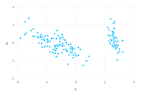

In [9]:
plot(x=pc[:, 1], y=pc[:, 2], Geom.point)